In [33]:
import os
import json

from pymef import MefSession
from bids import BIDSLayout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import text

In [2]:
path_to_dataset = r"E:\\Program Files\\Magisterka_dane"
l = BIDSLayout(path_to_dataset)

In [3]:
filter_dictionary = {'subject': '004',
                     'session': '001',
                     'task': 'FR',
                     'run': 1,
                     'suffix': 'ieeg',
                     'extension': 'json'}
json_files = l.get(**filter_dictionary)
json_file = json_files[0]
print(json_file)

json_entities = json_file.entities

<BIDSJSONFile filename='E:\Program Files\Magisterka_dane\sub-004\ses-001\ieeg\sub-004_ses-001_task-FR_run-01_ieeg.json'>


In [4]:
electrodes_file = pd.read_csv('E:\Program Files\Magisterka_dane\sub-004\ses-001\ieeg\sub-004_ses-001_space-APC_electrodes.tsv', sep='\t')
electrodes_file

,name,x,y,z,size,material,manufacturer,group,type,anatomy_structure
0,LZ_01,4.2,15.6,68.1,2,Pt,PMT,LZ,ring,wm
1,LZ_10,-26.6,17.0,85.0,2,Pt,PMT,LZ,ring,precentral gyrus
2,LAM_08,-31.5,-46.3,66.8,2,Pt,PMT,LAM,ring,middle temporal gyrus
3,LAM_09,-34.4,-48.0,68.8,2,Pt,PMT,LAM,ring,middle temporal gyrus
4,LAM_10,-37.2,-49.7,70.8,2,Pt,PMT,LAM,ring,middle temporal gyrus
...,...,...,...,...,...,...,...,...,...,...
123,LAM_03,-17.3,-38.0,56.6,2,Pt,PMT,LAM,ring,wm
124,LAM_04,-20.1,-39.6,58.7,2,Pt,PMT,LAM,ring,middle temporal gyrus
125,LAM_05,-23.0,-41.3,60.7,2,Pt,PMT,LAM,ring,middle temporal gyrus
126,LAM_06,-25.8,-43.0,62.7,2,Pt,PMT,LAM,ring,middle temporal gyrus


In [5]:
channel_file  = pd.read_csv('E:\Program Files\Magisterka_dane\sub-004\ses-001\ieeg\sub-004_ses-001_task-FR_run-01_channels.tsv', sep='\t')
channel_file

,index,name,type,units,low_cutoff,high_cutoff,reference,sampling_frequency
0,0,LZ_01,SEEG,uV,0.1,6000.0,intracranial,32000
1,1,LZ_10,SEEG,uV,0.1,6000.0,intracranial,32000
2,2,LAM_08,SEEG,uV,0.1,6000.0,intracranial,32000
3,3,LAM_09,SEEG,uV,0.1,6000.0,intracranial,32000
4,4,LAM_10,SEEG,uV,0.1,6000.0,intracranial,32000
...,...,...,...,...,...,...,...,...
132,132,RIGHT_X_COORD,EYEGAZE,px,NaN,NaN,intracranial,150
133,133,RIGHT_Y_COORD,EYEGAZE,px,NaN,NaN,intracranial,150
134,134,MIC,AUDIO,dBFS,NaN,NaN,intracranial,44100
135,0,SCREEN_X,EYEGAZE,px,NaN,NaN,intracranial,150


In [6]:
events_file = pd.read_csv('E:\Program Files\Magisterka_dane\sub-004\ses-001\ieeg\sub-004_ses-001_task-FR_run-01_events.tsv', sep='\t')
print(events_file['trial_type'].unique())
events_file

[nan 'COUNTDOWN' 'ENCODE' 'DISTRACTOR' 'RECALL']


,onset,duration,sample,trial_type,value,text,word_id,list
0,45.082920,0.0,1442653,NaN,129,NaN,NaN,NaN
1,50.080511,0.0,1602576,NaN,226,NaN,NaN,NaN
2,52.078136,0.0,1666500,NaN,225,NaN,NaN,NaN
3,53.087291,0.0,1698793,NaN,161,NaN,NaN,NaN
4,54.578135,0.0,1746500,NaN,224,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
994,1868.026535,0.0,59776849,RECALL,170,CAGE,38.0,14.0
995,1960.507121,0.0,62736227,RECALL,161,LAWN,144.0,15.0
996,1979.907121,0.0,63357027,RECALL,162,SPEAR,240.0,15.0
997,1961.807121,0.0,62777827,RECALL,163,ROOF,201.0,15.0


In [7]:
mef_session_path = os.path.splitext(json_file.path)[0]+'.mefd'
ms = MefSession(mef_session_path, 'erlichda') #enchiilada buritos konferencja w Meksyku pozdro elo 
print(ms)

Mef session: E:\Program Files\Magisterka_dane\sub-004\ses-001\ieeg\sub-004_ses-001_task-FR_run-01_ieeg.mefd/
Start time: 1553940917170848
End time: 1553942977177662
Number of time series channels: 137
Number of video channels: 0



In [8]:
channels = ['LA_01', 'LB_06', 'LC_09', 'MIC'] #wybrane kanały
session_metadata = ms.session_md
start = session_metadata['session_specific_metadata']['earliest_start_time'][0]
end  = session_metadata['session_specific_metadata']['latest_end_time'][0]
start_time = 0 
end_time = (end - start)*1e-6 #zamiana na sekundy
#data = ms.read_ts_channels_sample(channels, [start_time, end_time]) 
data = ms.read_ts_channels_uutc(channels, [start, end])  #zwraca wartości kanałów
bi = ms.read_ts_channel_basic_info()
records = ms.read_records() 

E:\Program Files\Magisterka\Projekt\venv\lib\site-packages\pymef\mef_session.py:1354: RuntimeWarning: Stop uutc later than latest end time. Will insert NaNs
  data = read_mef_ts_data(self._get_channel_md(channel),
E:\Program Files\Magisterka\Projekt\venv\lib\site-packages\pymef\mef_session.py:1354: RuntimeWarning: Start uutc earlier than earliest start time. Will insert NaNs
  data = read_mef_ts_data(self._get_channel_md(channel),


In [9]:
for i in range(len(records)):
    records_df = pd.DataFrame.from_dict(records)

records_df['onset'] = (records_df['time']-start)*1e-6

In [10]:
len_onset = events_file.shape[0]
def checkEyeMoveOffset(name=''):
    new_list = []
    eyemove_idx = (events_file[events_file['trial_type']== name].index.values).tolist()
    for i in eyemove_idx: 
        eyemove_onset = events_file['onset'][i]
        new_list.append(eyemove_onset)
    return new_list
# fix_onset = checkEyeMoveOffset(name='fixation')
# antiright_onset = checkEyeMoveOffset(name='antisaccade right')
# antileft_onset = checkEyeMoveOffset(name='antisaccade left')
# proright_onset = checkEyeMoveOffset(name='prosaccade right')
# proleft_onset = checkEyeMoveOffset(name='prosaccade left')

In [11]:
len_onset = records_df.shape[0]
def getTime(name=''):
    new_list = []
    text_idx = (records_df[records_df['text']== name].index.values).tolist()
    for i in text_idx: 
        text_idx = records_df['onset'][i]
        new_list.append(text_idx)
    return new_list

In [12]:
t = np.arange(1,16,1)
print(t)
distract_start_time = getTime(name='distractStart')
distract_end_time = getTime(name='distractEnd')
orient_time = getTime(name='orient')
recording_start_time = getTime(name='recordingStart')
recording_end_time = getTime(name='recordingEnd')
trial_start = []
for i in range(15):
    index = t[i]
    trial_start_i = getTime(name=f'trialstart_{index}')
    trial_start.append(trial_start_i)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [13]:
trial_start = np.sort(sum(trial_start, []))

In [14]:
#rint(trial_start)
print(distract_end_time)
print(recording_start_time)

[103.078209, 229.424377, 425.774392, 522.122603, 656.546893, 764.937099, 868.1643389999999, 970.9216729999999, 1074.985819, 1175.645059, 1318.216377, 1432.2646439999999, 1539.8638819999999, 1633.471094, 1764.317511, 1860.311628, 1956.9868709999998]
[103.12773999999999, 229.441002, 425.792173, 522.139416, 656.561393, 764.9509429999999, 868.177277, 970.9347349999999, 1075.00385, 1175.658716, 1318.229283, 1432.277769, 1539.883944, 1633.487032, 1764.3322289999999, 1860.326535, 1957.0071209999999]


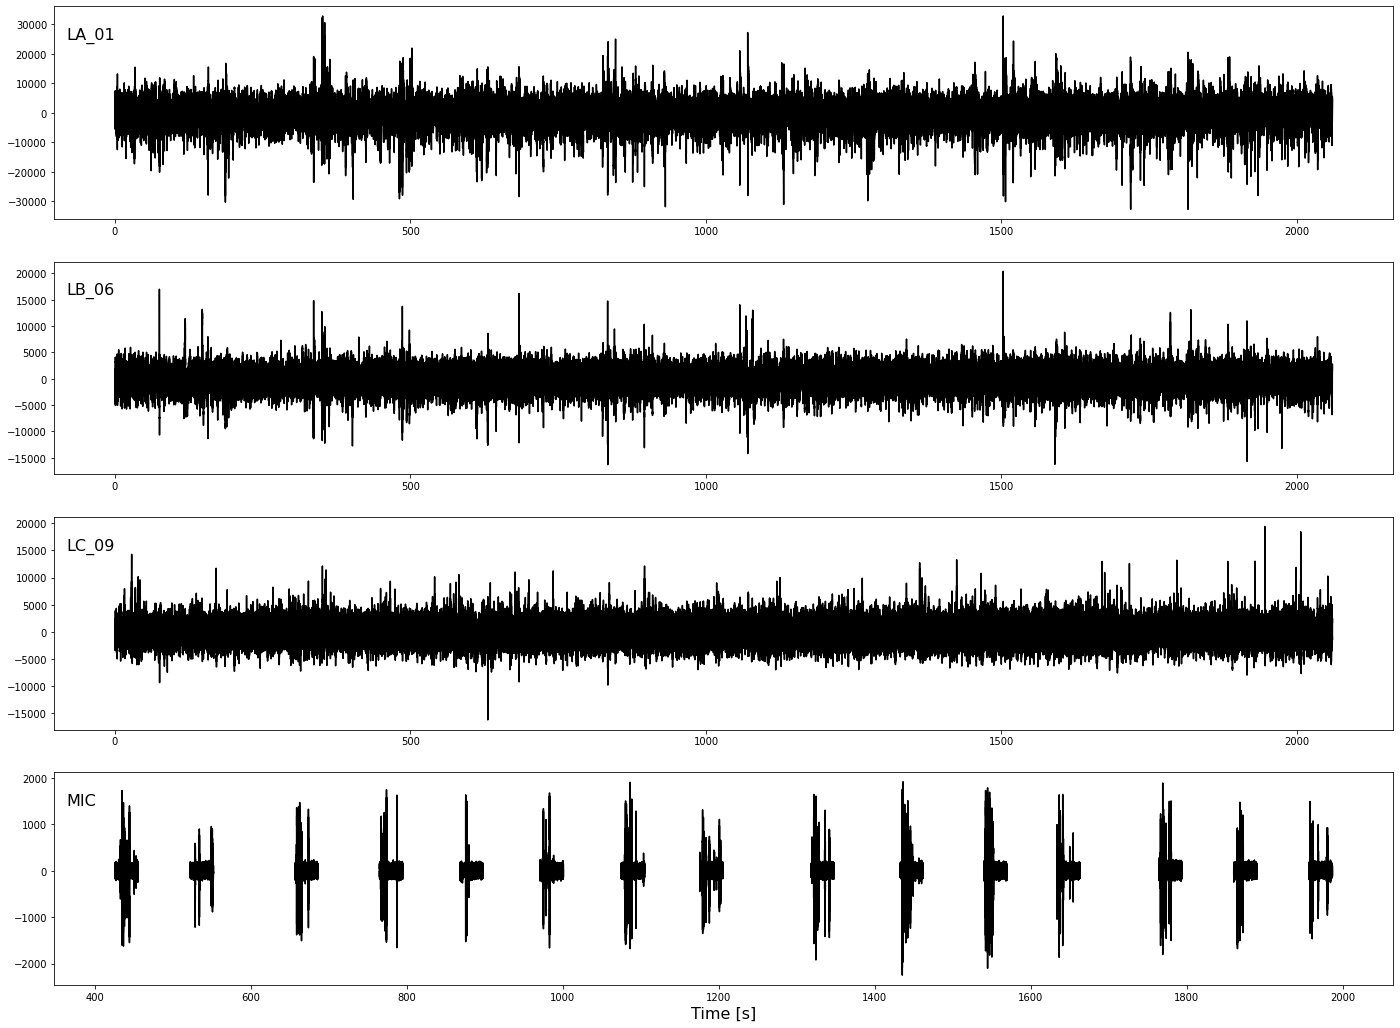

In [43]:
f, ax_arr = plt.subplots(len(channels), figsize=(24, 18))

for ax, channel, channel_data in zip(ax_arr, channels, data):
    fs = [x for x in bi if x['name'] == channel][0]['fsamp'][0]
    new_data = channel_data - np.nanmean(channel_data)
    plt.sca(ax)
    ax.annotate(channel, xy=(12, 180), xycoords='axes points', size=16)
    x = np.arange(start_time, end_time-1/fs, 1/fs)
    plt.plot(x, new_data, label=channel, color='black')
    
    if 'PUPIL' in channels:
        ax.set_ylim((-1.5*10e2, 0.5*10e2))
plt.xlabel('Time [s]', fontsize=16)
plt.savefig("channels.png", facecolor='white')

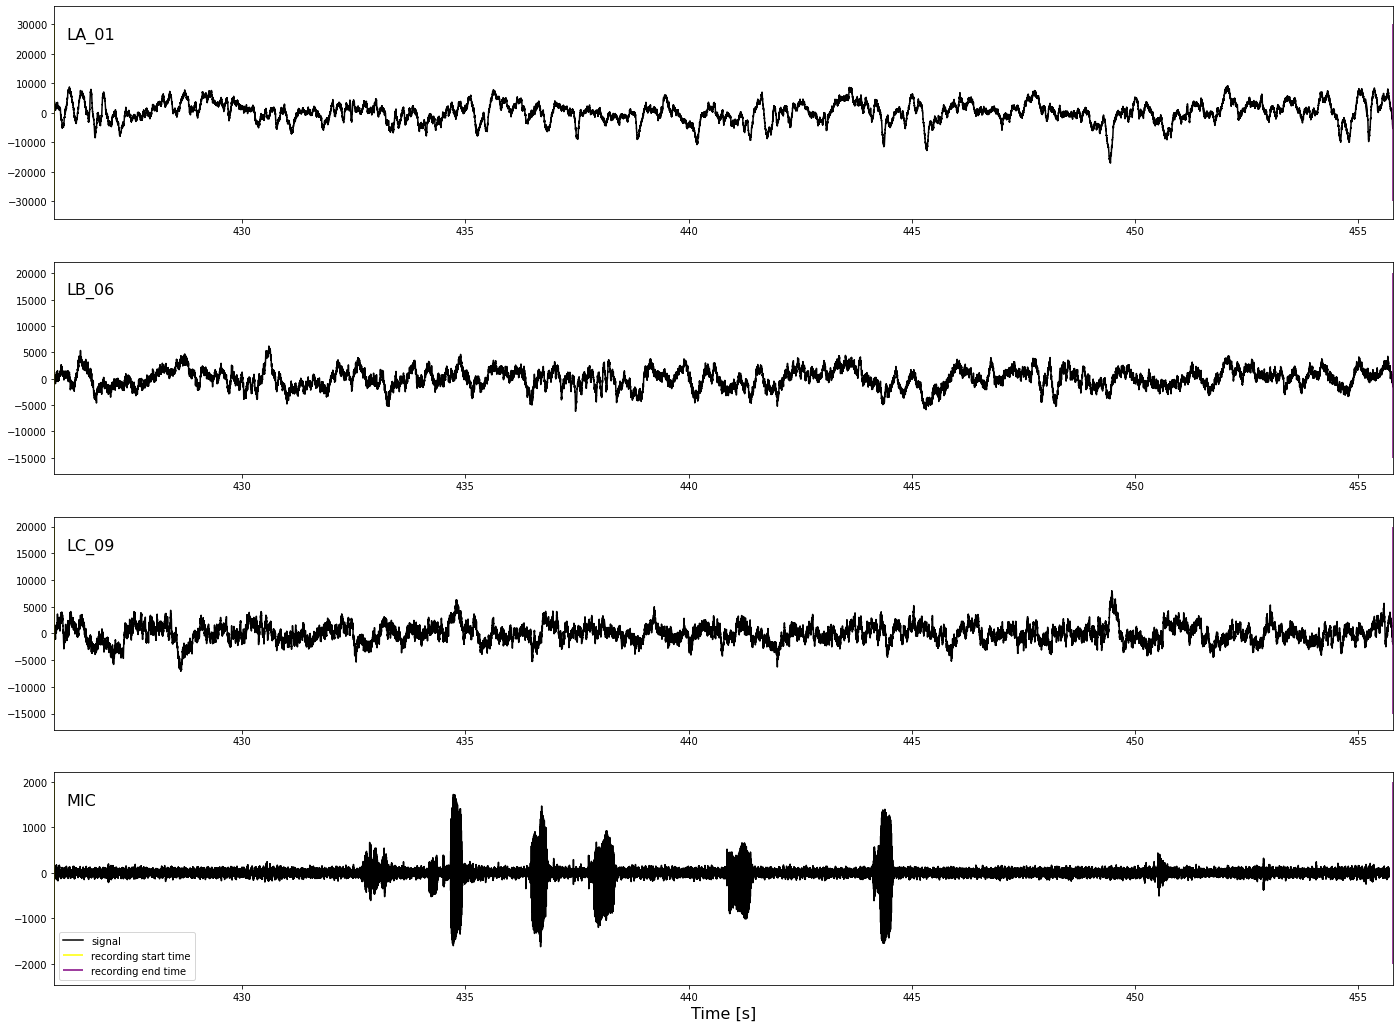

In [24]:
f, ax_arr = plt.subplots(len(channels), figsize=(24, 18))
for ax, channel, channel_data in zip(ax_arr, channels, data):
    new_data = channel_data - np.nanmean(channel_data)
    fs = [x for x in bi if x['name'] == channel][0]['fsamp'][0]
    plt.sca(ax)
    ax.annotate(channel, xy=(12, 180), xycoords='axes pixels', size=16)
    x = np.arange(0, end_time - 1/fs, 1/fs)
    print()
    plt.plot(x, new_data, label='signal', color='black')
    #plt.xlim((230, 800))  
    if 'PUPIL' in channels:
        ax.set_ylim((-1.5*10e2, 0.5*10e2))

    if channel == 'LA_01':
        ax.set_xlim(left=recording_start_time[2], right=recording_end_time[3])
        #ax.vlines(x=distract_start_time, ymin=-3*1e4, ymax=3*1e4, color='red', label='distract start time')
        #ax.vlines(x=distract_end_time, ymin=-3*1e4, ymax=3*1e4, color='blue', label='distract end time')
        #ax.vlines(x=orient_time, ymin=-3*1e4, ymax=3*1e4, color='green', label='orient time')
        ax.vlines(x=recording_start_time, ymin=-3*1e4, ymax=3*1e4, color='yellow', label='recording start time')
        ax.vlines(x=recording_end_time, ymin=-3*1e4, ymax=3*1e4, color='purple', label='recording end time')
        #ax.vlines(x=trial_start, ymin=-3*1e4, ymax=3*1e4, color='magenta', label='trial start')

    if channel == 'LB_06' or channel == 'LC_09':
        ax.set_xlim(left=recording_start_time[2], right=recording_end_time[3])
        #ax.vlines(x=distract_start_time, ymin=-1.5*1e4, ymax=2*1e4, color='red', label='distract start time')
        #ax.vlines(x=distract_end_time, ymin=-1.5*1e4, ymax=2*1e4, color='blue', label='distract end time')
        #ax.vlines(x=orient_time, ymin=-1.5*1e4, ymax=2*1e4, color='green', label='orient time')
        ax.vlines(x=recording_start_time, ymin=-1.5*1e4, ymax=2*1e4, color='yellow', label='recording start time')
        ax.vlines(x=recording_end_time, ymin=-1.5*1e4, ymax=2*1e4, color='purple', label='recording end time')
        #ax.vlines(x=trial_start, ymin=-1.5*1e4, ymax=2*1e4, color='magenta', label='trial start')

    if channel == 'MIC':
        ax.set_xlim(left=recording_start_time[2], right=recording_end_time[3])
        #ax.vlines(x=distract_start_time, ymin=-2*1e3, ymax=2*1e3, color='red', label='distract start time')
        #ax.vlines(x=distract_end_time, ymin=-2*1e3, ymax=2*1e3, color='blue', label='distract end time')
        #ax.vlines(x=orient_time, ymin=-2*1e3, ymax=2*1e3, color='green', label='orient time')
        ax.vlines(x=recording_start_time, ymin=-2*1e3, ymax=2*1e3, color='yellow', label='recording start time')
        ax.vlines(x=recording_end_time, ymin=-2*1e3, ymax=2*1e3, color='purple', label='recording end time')
        #ax.vlines(x=trial_start, ymin=-2*1e3, ymax=2*1e3, color='magenta', label='trial start')

    #plt.vlines(x=distract_start_time, ymin=-3*1e4, ymax=3*1e4, color='red', label='distract start time')
    #plt.vlines(x=distract_end_time, ymin=-3*1e4, ymax=3*1e4, color='blue', label='distract end time')
    #plt.vlines(x=orient_time, ymin=-3*1e4, ymax=3*1e4, color='green', label='orient time')
    #plt.vlines(x=recording_start_time, ymin=-3*1e4, ymax=3*1e4, color='yellow', label='recording start time')
    #plt.vlines(x=recording_end_time, ymin=-3*1e4, ymax=3*1e4, color='purple', label='recording end time')
    #plt.vlines(x=trial_start, ymin=-3*1e4, ymax=3*1e4, color='magenta', label='trial start')

plt.legend(loc='lower left')
plt.xlabel('Time [s]', fontsize=16)
plt.savefig("channels_and_time.png", facecolor='white')

In [15]:
records_df

,type,time,text,task_type,stimulus_duration,stimulus_type,patient_response,onset
0,SyLg,1553940962253768,trialstart_1,NaN,NaN,NaN,NaN,45.082920
1,SyLg,1553940967251359,orient,NaN,NaN,NaN,NaN,50.080511
2,SyLg,1553940969248984,blankScreen,NaN,NaN,NaN,NaN,52.078136
3,SyLg,1553940970258139,wordstart_1,NaN,NaN,NaN,NaN,53.087291
4,SyLg,1553940971748983,wordEnd,NaN,NaN,NaN,NaN,54.578135
...,...,...,...,...,...,...,...,...
994,Note,1553942785197383,CAGE,NaN,NaN,NaN,NaN,1868.026535
995,Note,1553942877677969,LAWN,NaN,NaN,NaN,NaN,1960.507121
996,Note,1553942897077969,SPEAR,NaN,NaN,NaN,NaN,1979.907121
997,Note,1553942878977969,ROOF,NaN,NaN,NaN,NaN,1961.807121


In [16]:
events_file

,onset,duration,sample,trial_type,value,text,word_id,list
0,45.082920,0.0,1442653,NaN,129,NaN,NaN,NaN
1,50.080511,0.0,1602576,NaN,226,NaN,NaN,NaN
2,52.078136,0.0,1666500,NaN,225,NaN,NaN,NaN
3,53.087291,0.0,1698793,NaN,161,NaN,NaN,NaN
4,54.578135,0.0,1746500,NaN,224,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
994,1868.026535,0.0,59776849,RECALL,170,CAGE,38.0,14.0
995,1960.507121,0.0,62736227,RECALL,161,LAWN,144.0,15.0
996,1979.907121,0.0,63357027,RECALL,162,SPEAR,240.0,15.0
997,1961.807121,0.0,62777827,RECALL,163,ROOF,201.0,15.0


In [18]:
recording_start_time[0]

103.12773999999999

In [19]:
recording_end_time[0]

133.113822

In [20]:
recording_start_time

[103.12773999999999,
 229.441002,
 425.792173,
 522.139416,
 656.561393,
 764.9509429999999,
 868.177277,
 970.9347349999999,
 1075.00385,
 1175.658716,
 1318.229283,
 1432.277769,
 1539.883944,
 1633.487032,
 1764.3322289999999,
 1860.326535,
 1957.0071209999999]

In [25]:
recording_end_time

[133.113822,
 259.432865,
 275.348952,
 455.782724,
 552.1313719999999,
 686.560443,
 794.948587,
 898.1759519999999,
 1000.930723,
 1104.994025,
 1205.655485,
 1348.22624,
 1462.273757,
 1569.873057,
 1663.4818639999999,
 1794.326092,
 1890.3212409999999,
 1987.0008899999998]

In [49]:
patient_response = records_df[924:998].sort_values(by=['onset'])
patient_response = patient_response.reset_index(drop=True)

In [50]:
patient_response

,type,time,text,task_type,stimulus_duration,stimulus_type,patient_response,onset
0,Note,1553941351763021,CLIFF,NaN,NaN,NaN,NaN,434.592173
1,Note,1553941353563021,ARK,NaN,NaN,NaN,NaN,436.392173
2,Note,1553941354863021,PIE,NaN,NaN,NaN,NaN,437.692173
3,Note,1553941357963021,OWL,NaN,NaN,NaN,NaN,440.792173
4,Note,1553941361263021,SOAP,NaN,NaN,NaN,NaN,444.092173
...,...,...,...,...,...,...,...,...
69,Note,1553942786697383,SEAT,NaN,NaN,NaN,NaN,1869.526535
70,Note,1553942789197383,JET,NaN,NaN,NaN,NaN,1872.026535
71,Note,1553942877677969,LAWN,NaN,NaN,NaN,NaN,1960.507121
72,Note,1553942878977969,ROOF,NaN,NaN,NaN,NaN,1961.807121


In [67]:
words_list = (records_df[677:856].sort_values(by=['onset'])).reset_index(drop=True)
words_list = (words_list.drop_duplicates(subset=['stimulus_type'])['stimulus_type']).values.tolist()

In [68]:
words_list

['PIE',
 'OWL',
 'BRUSH',
 'STAIR',
 'MULE',
 'OAK',
 'NET',
 'ROOM',
 'SOAP',
 'CAR',
 'ARK',
 'CLIFF',
 'FOAM',
 'SHRIMP',
 'SAIL',
 'ROCK',
 'LEG',
 'TOAST',
 'STRAW',
 'LAND',
 'SHOE',
 'TANK',
 'CLOTH',
 'DOLL',
 'FOOD',
 'FARM',
 'VEST',
 'GUARD',
 'CLOWN',
 'GOLD',
 'SNAKE',
 'CLOCK',
 'TRASH',
 'PLANE',
 'PLANT',
 'DOOR',
 'TEETH',
 'MOUSE',
 'DOCK',
 'JEEP',
 'PRINCE',
 'SHARK',
 'MAIL',
 'POND',
 'HOLE',
 'WAND',
 'VAN',
 'RICE',
 'FACE',
 'TREE',
 'BOOT',
 'SEAL',
 'BAND',
 'CUP',
 'JAR',
 'SHIP',
 'GATE',
 'STRING',
 'KITE',
 'CUBE',
 'PHONE',
 'CAPE',
 'JUICE',
 'HAT',
 'FRUIT',
 'STEAK',
 'DEER',
 'SEA',
 'BOWL',
 'HOOF',
 'SOCK',
 'WEED',
 'POLE',
 'GOAT',
 'STOVE',
 'BAG',
 'FROG',
 'NAIL',
 'STONE',
 'GEESE',
 'FORK',
 'DOG',
 'BOARD',
 'DIME',
 'DRUM',
 'BENCH',
 'CART',
 'RUG',
 'CASH',
 'TOAD',
 'THREAD',
 'BALL',
 'BEAR',
 'AXE',
 'STORE',
 'LEAF',
 'DART',
 'BOY',
 'EGG',
 'PIN',
 'SHEEP',
 'CROWN',
 'PANTS',
 'TENT',
 'CAT',
 'CANE',
 'BEE',
 'RAT',
 'HOOK',
 'JU

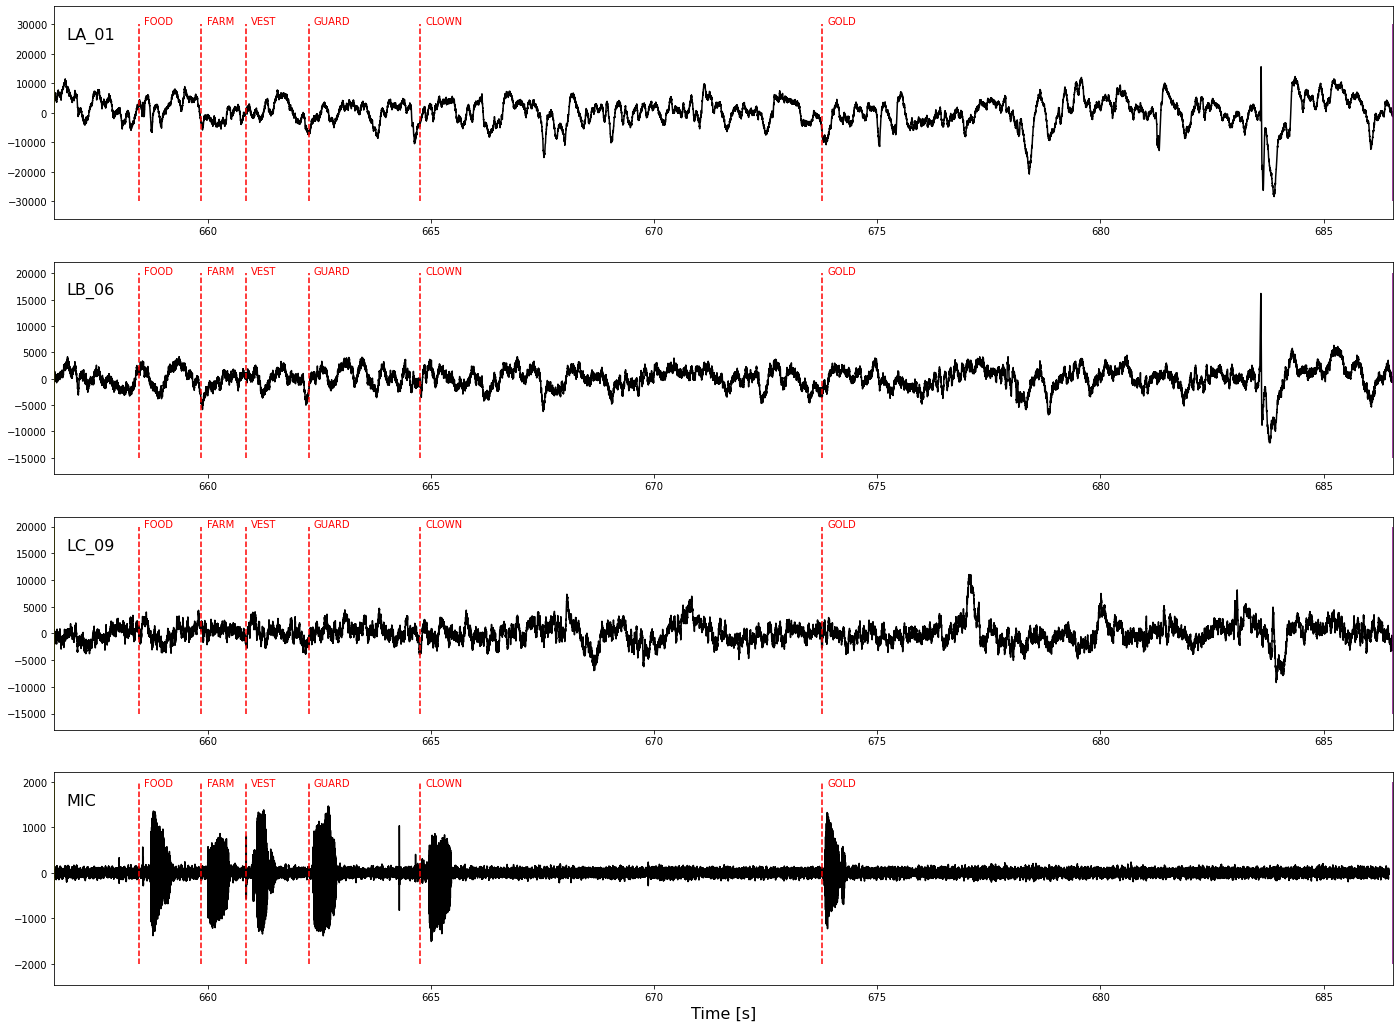

In [85]:
f, ax_arr = plt.subplots(len(channels), figsize=(24, 18))
for ax, channel, channel_data in zip(ax_arr, channels, data):
    new_data = channel_data - np.nanmean(channel_data)
    fs = [x for x in bi if x['name'] == channel][0]['fsamp'][0]
    plt.sca(ax)
    ax.annotate(channel, xy=(12, 180), xycoords='axes pixels', size=16)
    x = np.arange(0, end_time - 1/fs, 1/fs)
    print()
    plt.plot(x, new_data, label='signal', color='black')
    #plt.xlim((230, 800))
    if 'PUPIL' in channels:
        ax.set_ylim((-1.5*10e2, 0.5*10e2))

    if channel == 'LA_01':
        ax.set_xlim(left=recording_start_time[4], right=recording_end_time[5])
        #ax.vlines(x=distract_start_time, ymin=-3*1e4, ymax=3*1e4, color='red', label='distract start time')
        #ax.vlines(x=distract_end_time, ymin=-3*1e4, ymax=3*1e4, color='blue', label='distract end time')
        #ax.vlines(x=orient_time, ymin=-3*1e4, ymax=3*1e4, color='green', label='orient time')

        for i, x in enumerate(patient_response['text']):
            #text(i, 5, x, rotation=0, verticalalignment='center')
            if x in words_list:
                color = 'red'
            else:
                color = 'black'
            ax.annotate(x, (patient_response['onset'][i]+0.12, 3*1e4-100), color=color)
        ax.vlines(x=patient_response['onset'], ymin=-3*1e4, ymax=3*1e4, color=color, linestyles='dashed')

        ax.vlines(x=recording_start_time, ymin=-3*1e4, ymax=3*1e4, color='yellow', label='recording start time')
        ax.vlines(x=recording_end_time, ymin=-3*1e4, ymax=3*1e4, color='purple', label='recording end time')
        #ax.vlines(x=trial_start, ymin=-3*1e4, ymax=3*1e4, color='magenta', label='trial start')

    if channel == 'LB_06' or channel == 'LC_09':
        ax.set_xlim(left=recording_start_time[4], right=recording_end_time[5])
        #ax.vlines(x=distract_start_time, ymin=-1.5*1e4, ymax=2*1e4, color='red', label='distract start time')
        #ax.vlines(x=distract_end_time, ymin=-1.5*1e4, ymax=2*1e4, color='blue', label='distract end time')
        #ax.vlines(x=orient_time, ymin=-1.5*1e4, ymax=2*1e4, color='green', label='orient time')

        for i, x in enumerate(patient_response['text']):
            #text(i, 5, x, rotation=0, verticalalignment='center')
            if x in words_list:
                color = 'red'
            else:
                color = 'black'
            ax.annotate(x, (patient_response['onset'][i]+0.12, 2*1e4-100), color=color)
        ax.vlines(x=patient_response['onset'], ymin=-1.5*1e4, ymax=2*1e4, color=color, linestyles='dashed')

        ax.vlines(x=recording_start_time, ymin=-1.5*1e4, ymax=2*1e4, color='yellow', label='recording start time')
        ax.vlines(x=recording_end_time, ymin=-1.5*1e4, ymax=2*1e4, color='purple', label='recording end time')
        #ax.vlines(x=trial_start, ymin=-1.5*1e4, ymax=2*1e4, color='magenta', label='trial start')

    if channel == 'MIC':
        ax.set_xlim(left=recording_start_time[4], right=recording_end_time[5])
        #ax.vlines(x=distract_start_time, ymin=-2*1e3, ymax=2*1e3, color='red', label='distract start time')
        #ax.vlines(x=distract_end_time, ymin=-2*1e3, ymax=2*1e3, color='blue', label='distract end time')
        #ax.vlines(x=orient_time, ymin=-2*1e3, ymax=2*1e3, color='green', label='orient time')

        for i, x in enumerate(patient_response['text']):
            #text(i, 5, x, rotation=0, verticalalignment='center')
            if x in words_list:
                color = 'red'
            else:
                color = 'black'
            ax.annotate(x, (patient_response['onset'][i]+0.12, 1900), color=color)
        ax.vlines(x=patient_response['onset'], ymin=-2*1e3, ymax=2*1e3, color=color, linestyles='dashed')

        ax.vlines(x=recording_start_time, ymin=-2*1e3, ymax=2*1e3, color='yellow', label='recording start time')
        ax.vlines(x=recording_end_time, ymin=-2*1e3, ymax=2*1e3, color='purple', label='recording end time')
        #ax.vlines(x=trial_start, ymin=-2*1e3, ymax=2*1e3, color='magenta', label='trial start')

    #plt.vlines(x=distract_start_time, ymin=-3*1e4, ymax=3*1e4, color='red', label='distract start time')
    #plt.vlines(x=distract_end_time, ymin=-3*1e4, ymax=3*1e4, color='blue', label='distract end time')
    #plt.vlines(x=orient_time, ymin=-3*1e4, ymax=3*1e4, color='green', label='orient time')
    #plt.vlines(x=recording_start_time, ymin=-3*1e4, ymax=3*1e4, color='yellow', label='recording start time')
    #plt.vlines(x=recording_end_time, ymin=-3*1e4, ymax=3*1e4, color='purple', label='recording end time')
    #plt.vlines(x=trial_start, ymin=-3*1e4, ymax=3*1e4, color='magenta', label='trial start')

#plt.legend(loc='lower left')
plt.xlabel('Time [s]', fontsize=16)
plt.savefig("channels_and_time.png", facecolor='white')

In [82]:
for i, x in enumerate(patient_response['text']):
    if x in words_list:
        print('True:', x)
    else:
        print('False:', x)

True: CLIFF
True: ARK
True: PIE
True: OWL
True: SOAP
True: CLOTH
True: LEG
True: ROCK
True: FOOD
True: FARM
True: VEST
True: GUARD
True: CLOWN
True: GOLD
True: TEETH
True: MOUSE
True: JEEP
True: SHARK
True: HOLE
True: BOOT
True: SEAL
True: STEAK
True: WEED
True: CAPE
True: POLE
True: GOAT
True: DIME
True: STOVE
True: STONE
True: DOG
True: DRUM
True: BENCH
True: AXE
True: CASH
True: BALL
True: DART
True: BOY
True: CAT
True: CANE
True: BEE
True: SHEEP
True: CROWN
True: HOOK
True: JUDGE
True: GRASS
True: STEM
True: TIE
True: FUDGE
True: COW
True: CALF
True: ROSE
True: PEN
True: OAR
True: TOY
True: HEN
True: SPONGE
True: FISH
True: DESK
True: APE
True: PASTE
True: ANT
True: BIRD
True: WING
True: MOTH
True: WOOD
True: WAVE
True: MAP
True: BARN
True: CAGE
True: SEAT
True: JET
True: LAWN
True: ROOF
True: SPEAR


In [90]:
len(words_list)

179